In [48]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.

import matplotlib.pyplot as plt

In [49]:
data=pd.read_csv("C://Users/Pro/Downloads/flavors_of_cacao.csv")
data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Data Understanding

* Company (Maker-if known)Name of the company manufacturing the bar.
* Specific Bean Originor Bar NameThe specific geo-region of origin for the bar.
* REF - A value linked to when the review was entered in the database. Higher = more recent.
* ReviewDateDate of publication of the review.
* CocoaPercentCocoa percentage (darkness) of the chocolate bar being reviewed.
* CompanyLocationManufacturer base country.
* RatingExpert rating for the bar.
* BeanTypeThe variety (breed) of bean used, if provided.
* Broad BeanOriginThe broad geo-region of origin for the bean.

###### Handling missing values

In [50]:
# Let's have a look how many values are missing.
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [51]:
# category filled with mode
data['Bean\nType'].fillna(data['Bean\nType'].mode()[0], inplace=True)
data['Broad Bean\nOrigin'].fillna(data['Broad Bean\nOrigin'].mode()[0], inplace=True)
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

In [52]:
#The column name contains \n — this will give the errors during data analysis. Let’s format the column names:
original_col = data.columns
new_col = ['Company', 'Species', 'REF', 'ReviewDate', 'CocoaPercent','CompanyLocation', 'Rating', 'BeanType', 'Country']
data =data.rename(columns=dict(zip(original_col,new_col)))
data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [53]:
#The column CocoaPercent contains % sign — this will also give further errors. So we need to format this, too
#Remove % sign from CocoaPercent column 
data['CocoaPercent'] = data['CocoaPercent'].str.replace('%','').astype(float)/100
data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [54]:
#Lets have a look at the data and see identify Object/Categorical values and Continuous values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company            1795 non-null object
Species            1795 non-null object
REF                1795 non-null int64
ReviewDate         1795 non-null int64
CocoaPercent       1795 non-null float64
CompanyLocation    1795 non-null object
Rating             1795 non-null float64
BeanType           1795 non-null object
Country            1795 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


# Data Types

In [55]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 5 categorical variables
['Company', 'Species', 'CompanyLocation', 'BeanType', 'Country']


In [56]:
numeric = [num for num in data.columns if data[num].dtype!='O']
print('There are {} numeric variables'.format(len(numeric)))
numeric

There are 4 numeric variables


['REF', 'ReviewDate', 'CocoaPercent', 'Rating']

In [57]:
# let's visualise the values of the discrete variables 
# from all the numerical ones, those that contain a finite and small number of distinct values

discrete=[]
for var in numeric:
    if len(data[var].unique())<45:
        print (var, ' values: ', data[var].unique())
        discrete.append(var)
print('There are {} discrete variables'.format(len(discrete)))

ReviewDate  values:  [2016 2015 2014 2013 2012 2011 2009 2010 2017 2008 2007 2006]
Rating  values:  [3.75 2.75 3.   3.5  4.   3.25 2.5  5.   1.75 1.5  2.25 2.   1.  ]
There are 2 discrete variables


In [58]:
# continous variables 
continuous = [var for var in numeric if var not in discrete]
continuous

['REF', 'CocoaPercent']

In [60]:
# let's visualise the values of the categorical variables
for var in categorical:
    print(var, ' values: ', data[var].unique())

Company  values:  ['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao'
 "Akesson's (Pralus)" 'Alain Ducasse' 'Alexandre' 'Altus aka Cao Artisan'
 'Amano' 'Amatller (Simon Coll)' 'Amazona' 'Ambrosia' 'Amedei' 'AMMA'
 'Anahata' 'Animas' 'Ara' 'Arete' 'Artisan du Chocolat'
 'Artisan du Chocolat (Casa Luker)' 'Askinosie' 'Bahen & Co.' 'Bakau'
 'Bar Au Chocolat' "Baravelli's" 'Batch' 'Beau Cacao' 'Beehive'
 'Belcolade' 'Bellflower' 'Belyzium' 'Benoit Nihant' 'Bernachon'
 'Beschle (Felchlin)' 'Bisou' 'Bittersweet Origins' 'Black Mountain'
 'Black River (A. Morin)' 'Blanxart' 'Blue Bandana' 'Bonnat'
 'Bouga Cacao (Tulicorp)' 'Bowler Man' "Brasstown aka It's Chocolate"
 'Brazen' 'Breeze Mill' 'Bright' 'Britarev' 'Bronx Grrl Chocolate'
 'Burnt Fork Bend' 'Cacao Arabuco' 'Cacao Atlanta' 'Cacao Barry'
 'Cacao de Origen' 'Cacao de Origin' 'Cacao Hunters' 'Cacao Market'
 'Cacao Prieto' 'Cacao Sampaka' 'Cacao Store'
 'Cacaosuyo (Theobroma Inversiones)' 'Cacaoyere (Ecuatoriana)' 'Callebaut'
 'C

In [61]:
#Remove '\', '+' sign from BeanType & Country column as it will give error in encoding
data['BeanType'] = data['BeanType'].str.replace('\\','').astype(str)
data['BeanType'] = data['BeanType'].str.replace('+','').astype(str)

data['Country']=data['Country'].str.replace('\\', " ").astype(str)
data['Country']=data['Country'].str.replace('//', " ").astype(str)

#### Unique and frequent values

In [59]:
print(data['Rating'].unique())
Rating= data['Rating'].value_counts()
Rating

[3.75 2.75 3.   3.5  4.   3.25 2.5  5.   1.75 1.5  2.25 2.   1.  ]


3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

In [102]:
## Look at most frequent species
data['Species'].value_counts().head(10)

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Chuao                 19
Sambirano             19
Ocumare               17
Ghana                 15
Papua New Guinea      15
Name: Species, dtype: int64

In [104]:
## Look at most frequent origin countries
data['Country'].value_counts().head(10)

Venezuela             215
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Country, dtype: int64

##### Target variable Rating

In [65]:
# let's have a look at the most ratings
data[data.Rating>3.50]

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,0.70,France,4.00,,Peru
13,A. Morin,Equateur,1011,2013,0.70,France,3.75,,Ecuador
17,A. Morin,Chuao,1015,2013,0.70,France,4.00,Trinitario,Venezuela
20,A. Morin,Chanchamayo Province,1019,2013,0.63,France,4.00,,Peru
22,A. Morin,Peru,797,2012,0.63,France,3.75,,Peru
23,Acalli,"Chulucanas, El Platanal",1462,2015,0.70,U.S.A.,3.75,,Peru
24,Acalli,"Tumbes, Norandino",1470,2015,0.70,U.S.A.,3.75,Criollo,Peru
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,0.75,Switzerland,3.75,Trinitario,Indonesia


In [77]:
groupedby_rating = data.groupby('Rating')
groupedby_country = data.groupby('Country')
groupedby_beantype = data.groupby('BeanType')
groupedby_species = data.groupby('Species')
groupedby_cocoa=data.groupby('CocoaPercent')

In [88]:
#Visualize the rating data by 'Amazon mix' bean type
bean_group = groupedby_beantype.get_group('Amazon mix')
bean_group[['BeanType','Rating', 'Country',]]

,BeanType,Rating,Country
719,Amazon mix,4.0,Costa Rica
790,Amazon mix,3.5,Costa Rica


In [87]:
#Visualize the rating data by Country
country_country = groupedby_country.get_group('Venezuela')
country_country[['CocoaPercent','Rating', 'Country',]]

,CocoaPercent,Rating,Country
5,0.70,2.75,Venezuela
7,0.70,3.50,Venezuela
8,0.70,3.75,Venezuela
17,0.70,4.00,Venezuela
38,0.75,2.50,Venezuela
49,0.60,2.50,Venezuela
57,0.70,3.00,Venezuela
58,0.70,3.00,Venezuela
61,0.70,3.00,Venezuela
62,0.70,3.75,Venezuela


In [85]:
#Visualize the rating data by rating
country_rating = groupedby_rating.get_group(4.0)
country_rating[['CocoaPercent','Rating', 'Country',]]

,CocoaPercent,Rating,Country
9,0.70,4.0,Peru
17,0.70,4.0,Venezuela
20,0.63,4.0,Peru
54,0.70,4.0,Papua New Guinea
56,0.70,4.0,Ecuador
76,0.70,4.0,Venezuela
77,0.75,4.0,
83,0.70,4.0,Madagascar
87,0.66,4.0,
92,0.60,4.0,Brazil


In [110]:
data.groupby(['Country'])['Rating'].mean().sort_values(ascending=False).head(15)

Country
Peru, Dom. Rep                  4.000000
Guat., D.R., Peru, Mad., PNG    4.000000
Gre., PNG, Haw., Haiti, Mad     4.000000
Venezuela, Java                 4.000000
Dom. Rep., Madagascar           4.000000
Ven, Bolivia, D.R.              4.000000
Venez,Africa,Brasil,Peru,Mex    3.750000
DR, Ecuador, Peru               3.750000
Ven.,Ecu.,Peru,Nic.             3.750000
Peru, Belize                    3.750000
Dominican Rep., Bali            3.750000
PNG, Vanuatu, Mad               3.750000
South America                   3.666667
Tobago                          3.625000
Venezuela/ Ghana                3.500000
Name: Rating, dtype: float64

### Adding features

In [112]:
## Let's define blend feature
data['is_blend'] = np.where(
    np.logical_or(
        np.logical_or(data['Species'].str.lower().str.contains(',|(blend)|;'),
                      data['Country'].str.len() == 1),
        data['Country'].str.lower().str.contains(',')
    )
    , 1
    , 0
)
## How many blends/pure cocoa?
data['is_blend'].value_counts()

0    1112
1     683
Name: is_blend, dtype: int64

In [113]:
## Look at 5 blends/pure rows
data.groupby('is_blend').head(5)

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country,is_blend
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0
23,Acalli,"Chulucanas, El Platanal",1462,2015,0.70,U.S.A.,3.75,,Peru,1
24,Acalli,"Tumbes, Norandino",1470,2015,0.70,U.S.A.,3.75,Criollo,Peru,1
26,Adi,"Vanua Levu, Toto-A",705,2011,0.80,Fiji,3.25,Trinitario,Fiji,1
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,0.72,Fiji,3.50,Trinitario,Fiji,1
29,Aequare (Gianduja),"Los Rios, Quevedo, Arriba",370,2009,0.55,Ecuador,2.75,Forastero (Arriba),Ecuador,1


In [115]:
## Define domestic feature
data['is_domestic'] = np.where(data['Country'] == data['CompanyLocation'], 1, 0)
data['is_domestic'].value_counts()

0    1594
1     201
Name: is_domestic, dtype: int64

In [116]:
## Look at 5 domicile rows
data.groupby('is_domestic').head(5)

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country,is_blend,is_domestic
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0,0
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0,0
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0,0
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0,0
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0,0
25,Adi,Vanua Levu,705,2011,0.60,Fiji,2.75,Trinitario,Fiji,0,1
26,Adi,"Vanua Levu, Toto-A",705,2011,0.80,Fiji,3.25,Trinitario,Fiji,1,1
27,Adi,Vanua Levu,705,2011,0.88,Fiji,3.50,Trinitario,Fiji,0,1
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,0.72,Fiji,3.50,Trinitario,Fiji,1,1
29,Aequare (Gianduja),"Los Rios, Quevedo, Arriba",370,2009,0.55,Ecuador,2.75,Forastero (Arriba),Ecuador,1,1


# Outliers

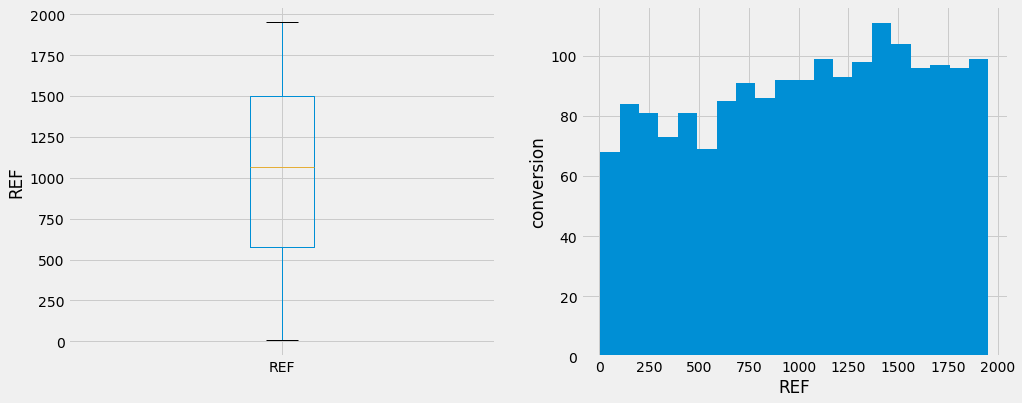

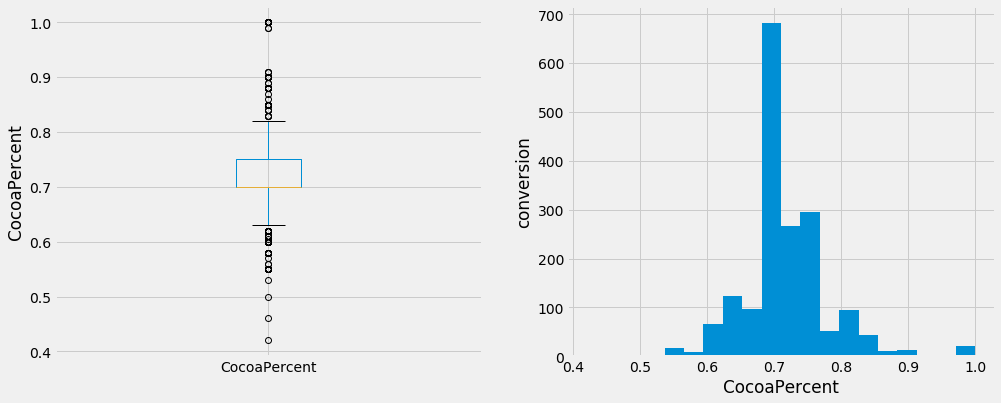

In [62]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('conversion')
    fig.set_xlabel(var)

    plt.show()

In [63]:
# let's have a look at the most extreme outliers
data[data.CocoaPercent>0.99]

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
125,Artisan du Chocolat,Venezuela,486,2010,1.0,U.K.,1.75,,Venezuela
245,Bonnat,One Hundred,81,2006,1.0,France,1.50,,
249,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",341,2009,1.0,Ecuador,1.50,Forastero (Arriba),Ecuador
330,C-Amaro,Ecuador,1185,2013,1.0,Italy,3.50,,Ecuador
437,Claudio Corallo,Principe,252,2008,1.0,Sao Tome,1.00,Forastero,Sao Tome & Principe
449,Coppeneur,Ecuador Puristique,817,2012,1.0,Germany,1.50,,Ecuador
557,Domori,"IL100, H. San Jose",1109,2013,1.0,Italy,3.00,Criollo,Venezuela
779,Habitual,one hundred,1205,2014,1.0,Canada,2.00,,
828,Hotel Chocolat,"Island Growers, 2012, 120hr c.",1113,2013,1.0,U.K.,1.75,Trinitario,St. Lucia
834,Hotel Chocolat (Coppeneur),"Chanchamayo, Pichanadi, 2012, 60hr c.",1109,2013,1.0,U.K.,2.75,,Peru


* above are 100% Cocoa products, which are not actually not outliers.
* personally i like 100% cocoa chocolates so i will not treat it as oulier

# Data Visualization

1. Histogram Plot on numerical dtypes
    * Wikipedia definition:
A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).
    * After reading the above definition one might say, “Except object or categorical variables/values, we can plot a histogram for anything.”
    * in this case we have converted all the features into numeric

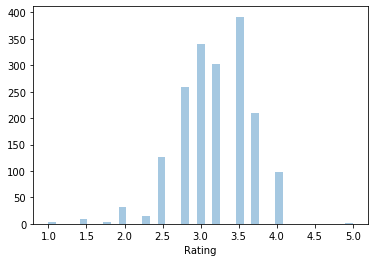

In [34]:
#Let's see the distribution of continuous variables
import seaborn as sns
sns.distplot(data['Rating'],kde = False)
plt.show()

The number of different ratings given are counted and plotted. The bars are displayed next to each other, because the variable being measured is continuous and is on the x-axis. What’s the story behind this plot? We can see around 390 people provide 3.5 rating for the chocolates.

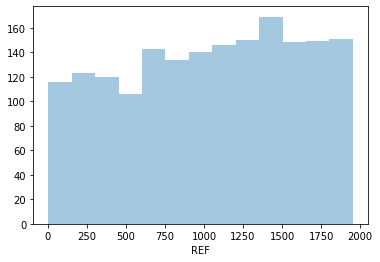

In [36]:
sns.distplot(data['REF'],kde = False)
plt.show()

The REF column is the reference number of the ratings received. The higher reference number is the latest one.

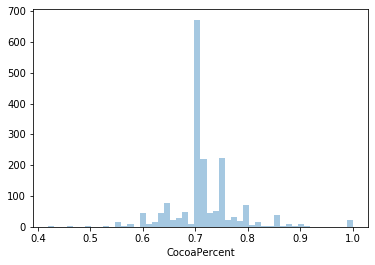

In [37]:
sns.distplot(data['CocoaPercent'],kde = False)
plt.show()

* The next continuous variable is CocoaPercent. A lot of people like dark chocolates (I do), so we want to see the distribution of the darkness included in the chocolates.
* most of the people prefer 70% cocoa in their chocolates

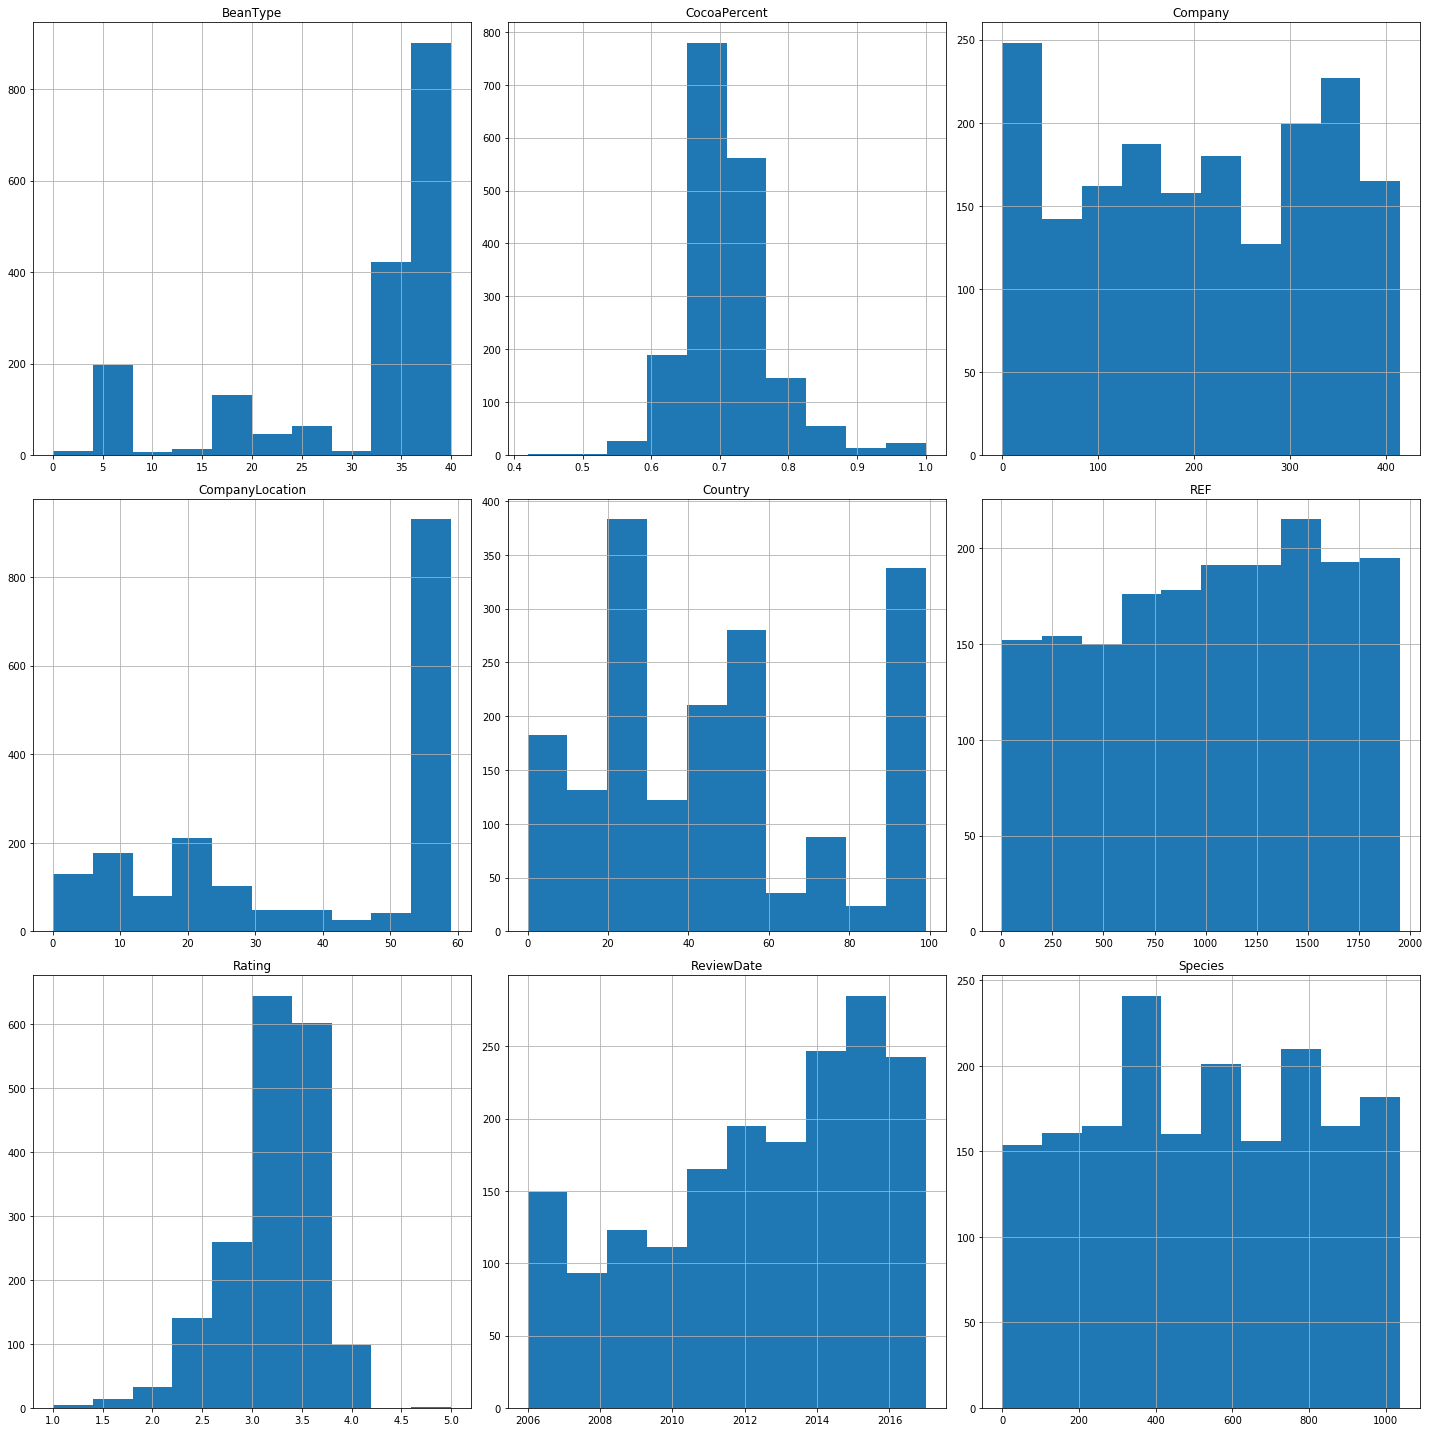

In [39]:
data.hist(figsize=(20, 20))
plt.tight_layout()# tight_layout() will adjust spacing between subplots to minimize the overlaps. let's make good plots
plt.show()

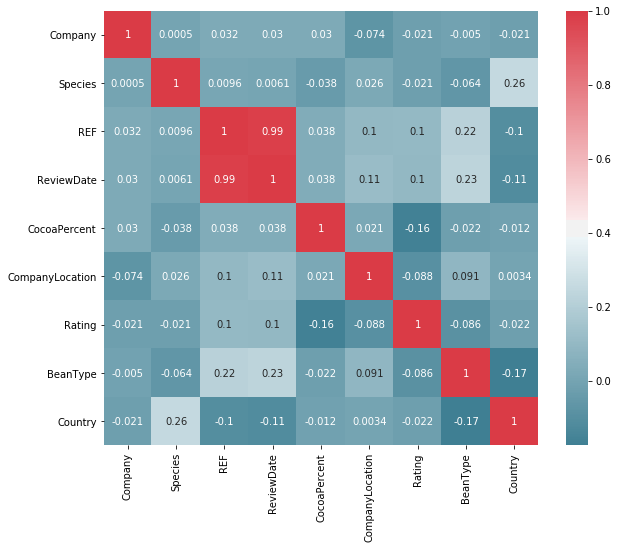

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,
            square=True, ax=ax)

In [42]:
data.corr()*100

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
Company,100.000000,0.050492,3.168464,2.986080,2.952407,-7.350515,-2.137057,-0.500179,-2.106108
Species,0.050492,100.000000,0.958854,0.612663,-3.753995,2.619510,-2.059293,-6.435431,25.665786
REF,3.168464,0.958854,100.000000,98.507587,3.779120,10.007605,10.102984,21.850097,-10.399469
ReviewDate,2.986080,0.612663,98.507587,100.000000,3.817690,11.489874,9.984650,22.969976,-11.396679
CocoaPercent,2.952407,-3.753995,3.779120,3.817690,100.000000,2.079780,-16.482018,-2.177035,-1.190616
CompanyLocation,-7.350515,2.619510,10.007605,11.489874,2.079780,100.000000,-8.809871,9.104610,0.343477
Rating,-2.137057,-2.059293,10.102984,9.984650,-16.482018,-8.809871,100.000000,-8.573639,-2.182147
BeanType,-0.500179,-6.435431,21.850097,22.969976,-2.177035,9.104610,-8.573639,100.000000,-17.465572
Country,-2.106108,25.665786,-10.399469,-11.396679,-1.190616,0.343477,-2.182147,-17.465572,100.000000


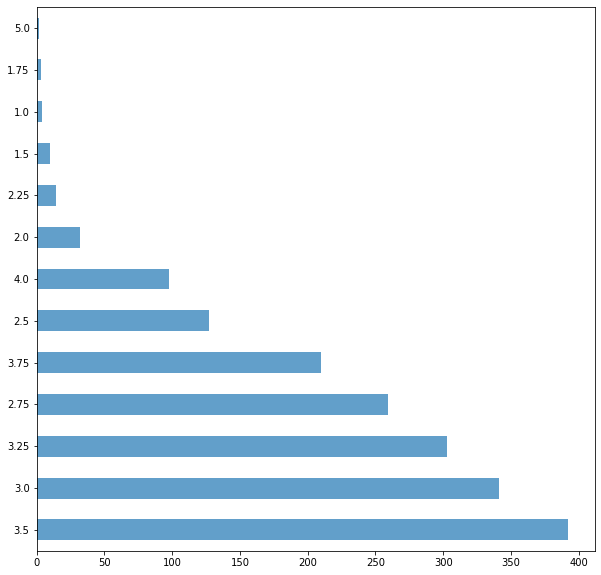

In [20]:
#Visualize overall rating by users
data['Rating'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Chocolate Rating Distribution')

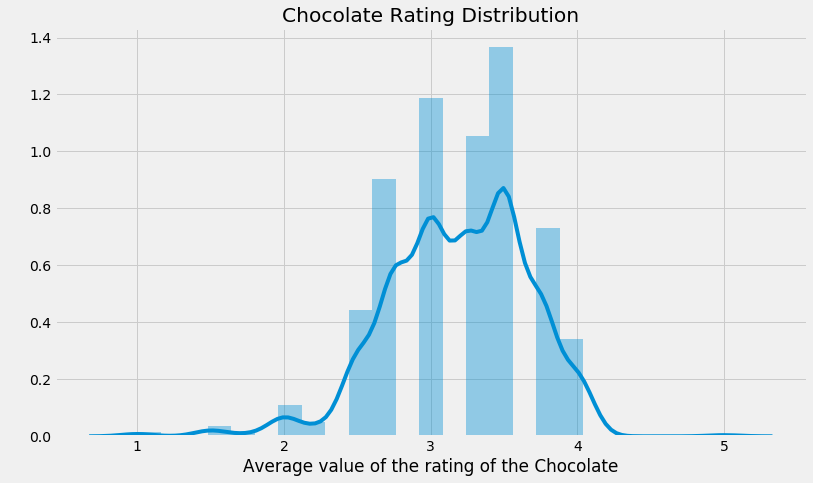

In [43]:
#Distribution of the target variable: Rating
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data['Rating'], bins=25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("Average value of the rating of the Chocolate")
plt.ylabel(" ")
plt.title("Chocolate Rating Distribution")

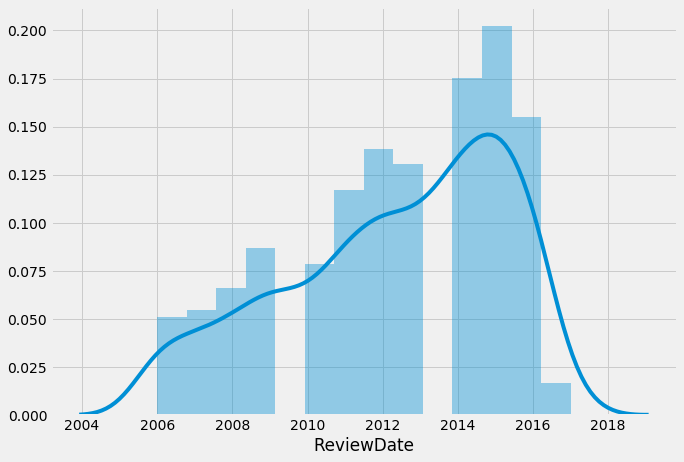

In [108]:
## Look at YEAR distribution
plt.figure(figsize=(10,7))
sns.distplot(data['ReviewDate'])


### Relationship with Rating and each feature


Text(0, 0.5, 'Rating')

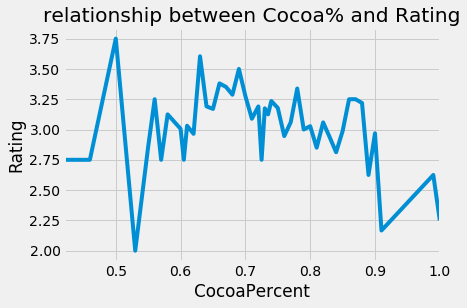

In [46]:
fig = plt.figure()
fig = data.groupby(['CocoaPercent'])['Rating'].mean().plot()
fig.set_title('relationship between Cocoa% and Rating')
fig.set_ylabel('Rating')

Text(0.5, 1.0, 'Boxplot, Rating for REF')

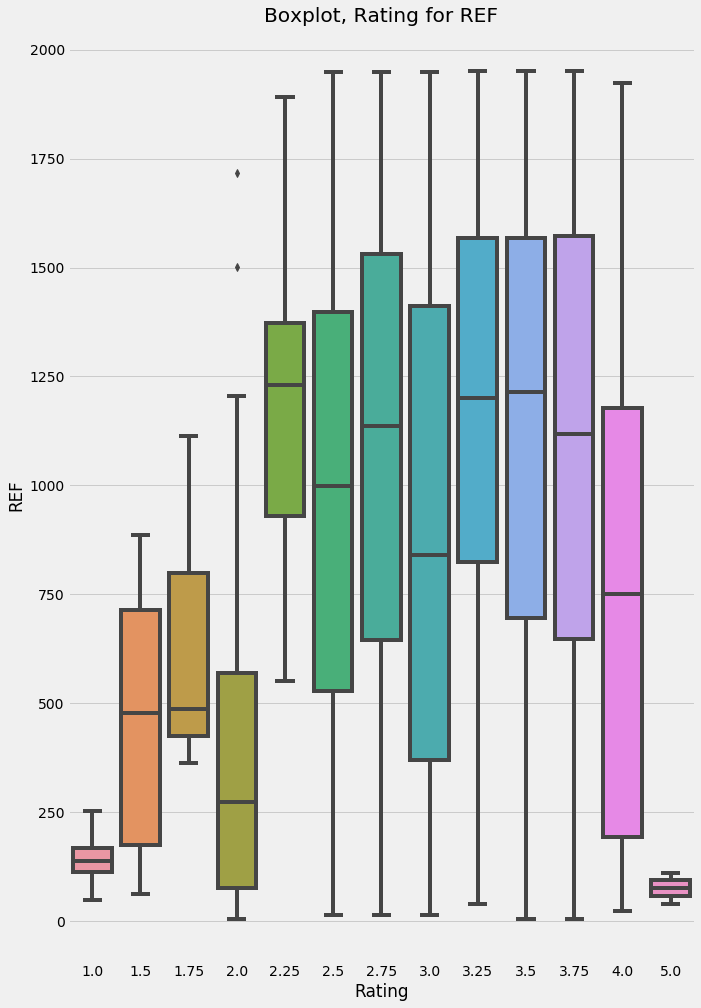

In [100]:
# REF:A value linked to when the review was entered in the database. Higher = more recent

fig, ax = plt.subplots(figsize=[10, 16])
sns.boxplot(
    data=data,
    y='REF',
    x='Rating'
)
ax.set_title('Boxplot, Rating for REF')

Text(0.5, 1.0, 'Boxplot, Rating for BeanType')

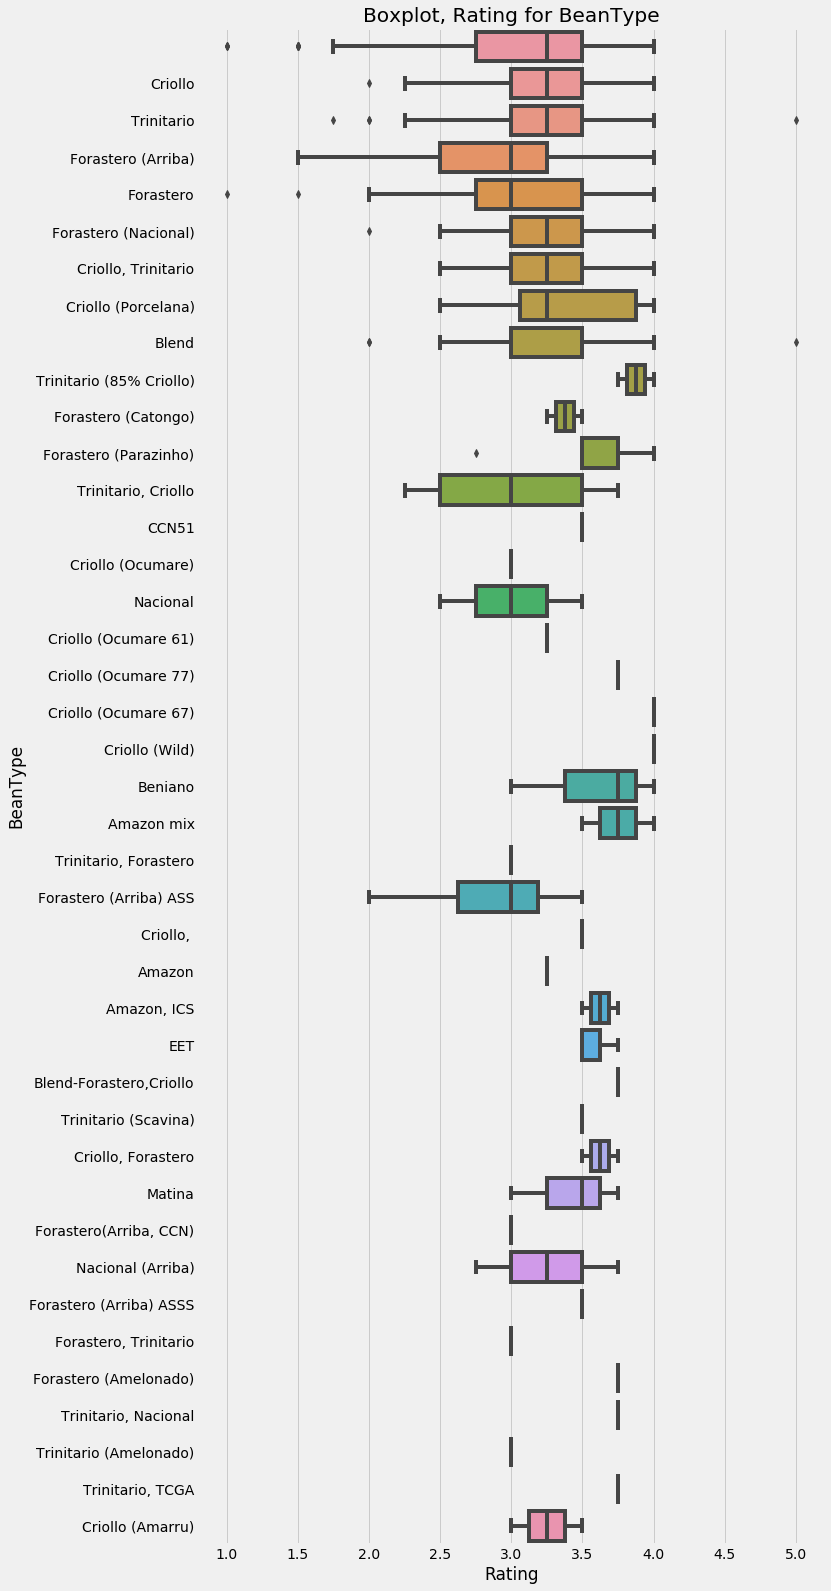

In [98]:

# box plot for bean type and the ratings given by customers.
# Look at boxplot over the bean type
fig, ax = plt.subplots(figsize=[10, 26])
sns.boxplot(
    data=data,
    y='BeanType',
    x='Rating'
)
ax.set_title('Boxplot, Rating for BeanType')

Text(0.5, 1.0, 'Boxplot, Rating for countries')

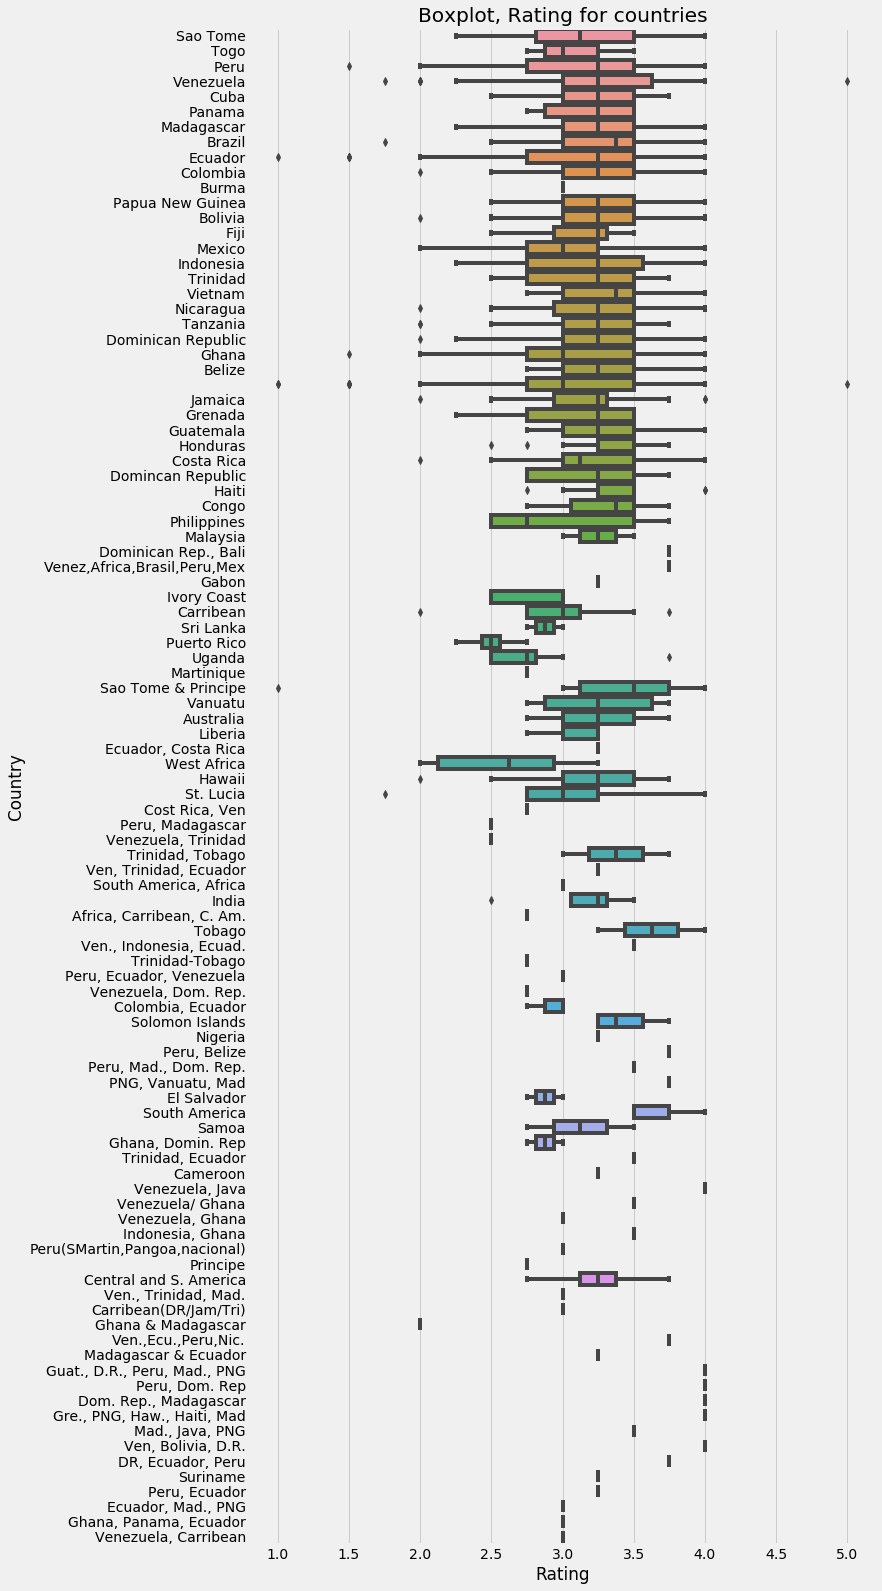

In [92]:
# box plot for chocolate manufacturing facilities and the ratings given by customers.
# Look at boxplot over the countries
fig, ax = plt.subplots(figsize=[10, 26])
sns.boxplot(
    data=data,
    y='Country',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries')

the ratings given to chocolate bars for each individual country. This visualization can help us understand the distribution of ratings throughout the dataset according to each countries and further help in finding which country has more popularity than others.
It also explains which country is more profitable to the sellers and potential regions to target.

Text(0.5, 1.0, 'Boxplot, Rating by Company location')

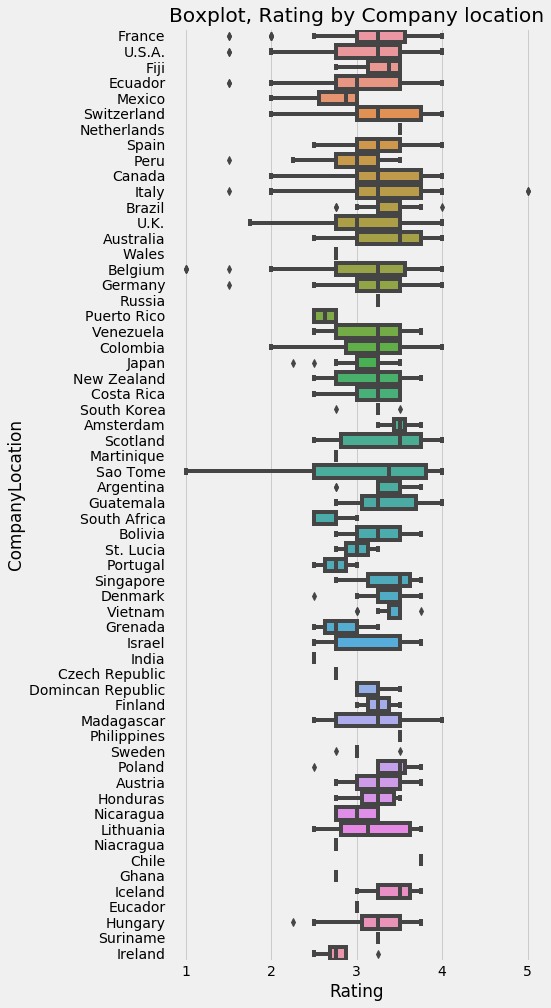

In [106]:
## Look at rating by company location
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=data,
    y='CompanyLocation',
    x='Rating'
)
ax.set_title('Boxplot, Rating by Company location')

Text(0.5, 1.0, 'Boxplot, Rating by Domestic')

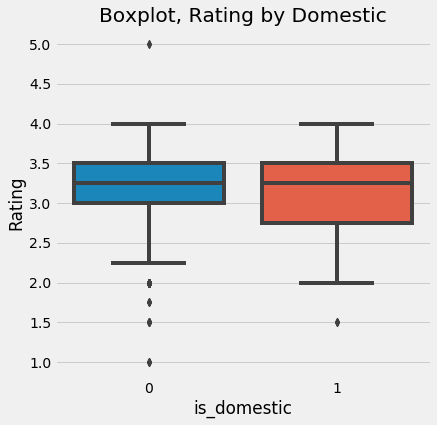

In [118]:
## What better? Domestic Or not?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=data,
    x='is_domestic',
    y='Rating',
)
ax.set_title('Boxplot, Rating by Domestic')

Text(0.5, 1.0, 'Boxplot, Rating by Blend/Pure')

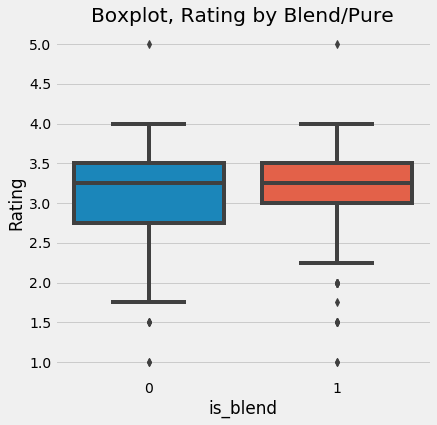

In [120]:
## What better? Pure or blend?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=data,
    x='is_blend',
    y='Rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

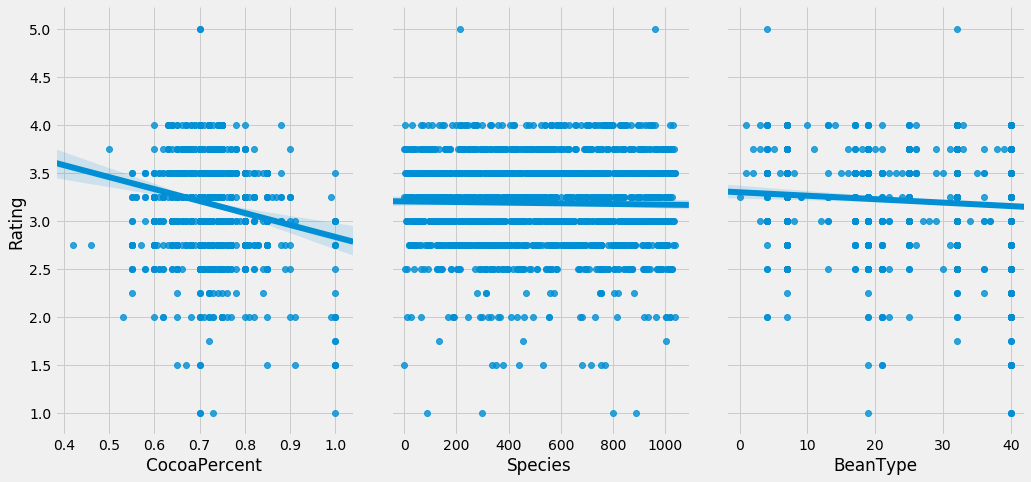

In [128]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['CocoaPercent','Species','BeanType'], y_vars='Rating', size=7, aspect=0.7, kind='reg')

### Encoding categorical data

In [122]:
#Categorical boolean mask
categorical_feature_mask = data.dtypes=='object'
#filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [123]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(3)# apply OneHotEncoder on categorical feature columns

,Company,Species,CompanyLocation,BeanType,Country
0,0,14,18,40,67
1,0,492,18,40,77
2,0,67,18,40,77


# Feature Importance 

In [180]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


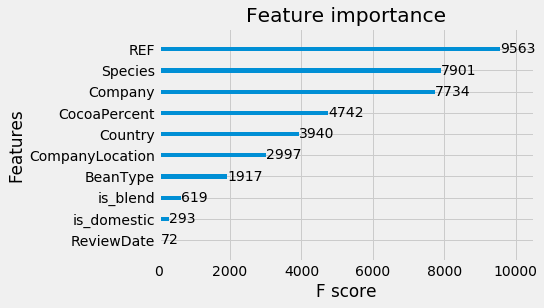

In [173]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.show()